In [1]:
import pandas as pd

In [2]:
#한글파일 읽어오면 utf-8 관련 에러발생
#encoding= 'ISO-8859-1' 추가하면 에러는 피할 수 있지만 한글은 여전히 깨짐
#engine = 'python' 추가하면 에러도 피하고 한글도 안 깨짐

spring = pd.read_csv('data/all_winter.csv', engine = 'python')

In [3]:
spring.head()

,도서명,부제목,출간일,분야,정가,평점,쪽수,eBook 여부,제목 길이,순위,베스트셀러 여부
0,신경 끄기의 기술,인생에서 가장 중요한 것만 남기는 힘,20171027.0,자기계발,15000.0,8.7,236,1,9,1,1
1,언어의 온도(3주년 150만부 기념 에디션),말과 글에는 나름의 따뜻함과 차가움이 있다,20160819.0,시/에세이,13800.0,8.8,308,1,6,2,1
2,82년생 김지영(오늘의 젊은 작가 13)(양장본 HardCover),조남주 장편소설,20161014.0,소설,13000.0,8.9,192,1,8,3,1
3,트렌드 코리아 2018(10주년 특별판),서울대 소비트렌드분석센터의 2018 전망,20171030.0,경제/경영,18000.0,8.3,460,1,12,4,1
4,파리의 아파트,NaN,20171205.0,소설,14500.0,9.1,408,1,7,5,1


In [4]:
spring.loc[spring['분야'] == '소설', '분야'] = 1
spring.loc[spring['분야'] == '시/에세이', '분야'] = 2
spring.loc[spring['분야'] == '인문', '분야'] = 3
spring.loc[spring['분야'] == '가정/육아', '분야'] = 4
spring.loc[spring['분야'] == '요리', '분야'] = 5
spring.loc[spring['분야'] == '건강', '분야'] = 6
spring.loc[spring['분야'] == '취미/실용/스포츠', '분야'] = 7
spring.loc[spring['분야'] == '경제/경영', '분야'] = 8
spring.loc[spring['분야'] == '자기계발', '분야'] = 9
spring.loc[spring['분야'] == '정치/사회', '분야'] = 10
spring.loc[spring['분야'] == '역사/문화', '분야'] = 11
spring.loc[spring['분야'] == '종교', '분야'] = 11
spring.loc[spring['분야'] == '예술/대중문화', '분야'] = 11
spring.loc[spring['분야'] == '한국소개도서', '분야'] = 11
spring.loc[spring['분야'] == '중/고등참고서', '분야'] = 12
spring.loc[spring['분야'] == '대학교재', '분야'] = 12
spring.loc[spring['분야'] == '기술/공학', '분야'] = 13
spring.loc[spring['분야'] == '컴퓨터/IT', '분야'] = 13
spring.loc[spring['분야'] == '외국어', '분야'] = 14
spring.loc[spring['분야'] == '여행', '분야'] = 14
spring.loc[spring['분야'] == '과학', '분야'] = 15
spring.loc[spring['분야'] == '취업/수험서', '분야'] = 16
spring.loc[spring['분야'] == '자격증/수험서작가', '분야'] = 16
spring.loc[spring['분야'] == '잡지', '분야'] = 17
spring.loc[spring['분야'] == '만화', '분야'] = 17
spring.loc[spring['분야'] == ':K컬렉션', '분야'] = 17
spring.loc[spring['분야'] == '청소년', '분야'] = 18
spring.loc[spring['분야'] == '초등참고서', '분야'] = 19
spring.loc[spring['분야'] == '어린이(초등)', '분야'] = 19
spring.loc[spring['분야'] == '어린이전집', '분야'] = 19
spring.loc[spring['분야'] == '어린이영어', '분야'] = 19
spring.loc[spring['분야'] == '유아(0~7세)', '분야'] = 20
spring.loc[spring['분야'] == '', '분야'] = 0

In [5]:
spring.loc[spring['쪽수'] == '준비중', '쪽수'] = 371
spring.loc[spring['쪽수'] == '210 * 270 mm  판형알림', '쪽수'] = 371
spring.loc[spring['쪽수'] == '178 * 238 * 18 mm /357g  판형알림', '쪽수'] = 371

D:\ProgramData\Anaconda\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [6]:
spring.loc[spring['부제목'].notnull(), '부제목'] = 1
spring.loc[spring['부제목'].isnull(), '부제목'] = 0

In [7]:
spring['정가'] = spring['정가'].fillna(spring['정가'].mean())
spring['평점'] = spring['평점'].fillna(spring['평점'].mean())
spring.loc[spring['분야'].isnull(), '분야'] = 0

In [8]:
spring['쪽수'] = spring['쪽수'].astype(int)
spring['분야'] = spring['분야'].astype(int)

In [9]:
print(spring['쪽수'].dtype)
print(spring['분야'].dtype)
print(spring['제목 길이'].dtype)
print(spring['정가'].dtype)

int32
int32
int64
float64


In [10]:
spring.head()

,도서명,부제목,출간일,분야,정가,평점,쪽수,eBook 여부,제목 길이,순위,베스트셀러 여부
0,신경 끄기의 기술,1,20171027.0,9,15000.0,8.7,236,1,9,1,1
1,언어의 온도(3주년 150만부 기념 에디션),1,20160819.0,2,13800.0,8.8,308,1,6,2,1
2,82년생 김지영(오늘의 젊은 작가 13)(양장본 HardCover),1,20161014.0,1,13000.0,8.9,192,1,8,3,1
3,트렌드 코리아 2018(10주년 특별판),1,20171030.0,8,18000.0,8.3,460,1,12,4,1
4,파리의 아파트,0,20171205.0,1,14500.0,9.1,408,1,7,5,1


In [11]:
spring.tail()

,도서명,부제목,출간일,분야,정가,평점,쪽수,eBook 여부,제목 길이,순위,베스트셀러 여부
3218,다크 타워. 6: 수재나의 노래,0,20191226.0,1,18000.0,8.6,644,1,17,0,0
3219,논점민법강의: 가족법(6판),0,20200101.0,16,20000.0,9.3,263,0,11,0,0
3220,하이스쿨 D×D. 11(완결),0,20200101.0,17,5500.0,10.0,160,1,12,0,0
3221,"리키, 너도 구를 수 있어!(양장본 HardCover)",0,20191122.0,20,12000.0,0.0,36,0,15,0,0
3222,라임튜브와 함께하는 우리 아이 유튜브 스타 만들기,1,20200106.0,13,15000.0,10.0,224,1,27,0,0


In [12]:
spring.head()

,도서명,부제목,출간일,분야,정가,평점,쪽수,eBook 여부,제목 길이,순위,베스트셀러 여부
0,신경 끄기의 기술,1,20171027.0,9,15000.0,8.7,236,1,9,1,1
1,언어의 온도(3주년 150만부 기념 에디션),1,20160819.0,2,13800.0,8.8,308,1,6,2,1
2,82년생 김지영(오늘의 젊은 작가 13)(양장본 HardCover),1,20161014.0,1,13000.0,8.9,192,1,8,3,1
3,트렌드 코리아 2018(10주년 특별판),1,20171030.0,8,18000.0,8.3,460,1,12,4,1
4,파리의 아파트,0,20171205.0,1,14500.0,9.1,408,1,7,5,1


In [13]:
spring.tail()

,도서명,부제목,출간일,분야,정가,평점,쪽수,eBook 여부,제목 길이,순위,베스트셀러 여부
3218,다크 타워. 6: 수재나의 노래,0,20191226.0,1,18000.0,8.6,644,1,17,0,0
3219,논점민법강의: 가족법(6판),0,20200101.0,16,20000.0,9.3,263,0,11,0,0
3220,하이스쿨 D×D. 11(완결),0,20200101.0,17,5500.0,10.0,160,1,12,0,0
3221,"리키, 너도 구를 수 있어!(양장본 HardCover)",0,20191122.0,20,12000.0,0.0,36,0,15,0,0
3222,라임튜브와 함께하는 우리 아이 유튜브 스타 만들기,1,20200106.0,13,15000.0,10.0,224,1,27,0,0


In [14]:
spring = spring[['부제목', '분야', '정가', '평점', '쪽수', 'eBook 여부', '제목 길이', '순위', '베스트셀러 여부']]

In [15]:
spring.isnull().sum()

부제목         0
분야          0
정가          0
평점          0
쪽수          0
eBook 여부    0
제목 길이       0
순위          0
베스트셀러 여부    0
dtype: int64

In [16]:
spring.isnull().sum()

부제목         0
분야          0
정가          0
평점          0
쪽수          0
eBook 여부    0
제목 길이       0
순위          0
베스트셀러 여부    0
dtype: int64

In [17]:
print(spring['평점'].dtypes)
print(spring['정가'].dtypes)
print(spring['분야'].dtypes)
print(spring['eBook 여부'].dtypes)
print(spring['부제목'].dtypes)
print(spring['쪽수'].dtypes)
print(spring['제목 길이'].dtypes)

float64
float64
int32
int64
object
int32
int64


## 로지스틱 회귀분석

In [18]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [19]:
x_data = spring[['부제목', '쪽수', 'eBook 여부', '제목 길이','평점','정가']] 
y_data = spring['베스트셀러 여부']
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xs_train = scaler.fit_transform(x_train)

In [21]:
x_data.head()

,부제목,쪽수,eBook 여부,제목 길이,평점,정가
0,1,236,1,9,8.7,15000.0
1,1,308,1,6,8.8,13800.0
2,1,192,1,8,8.9,13000.0
3,1,460,1,12,8.3,18000.0
4,0,408,1,7,9.1,14500.0


In [22]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression() #로지스틱 회귀분석 시행

log.fit(x_train, y_train) #모델 피팅(학습시키기)
print('학습용 데이터셋 정확도 : %.2f' % log.score(x_train, y_train)) #정확도
print('검증용 데이터셋 정확도 : %.2f' % log.score(x_test, y_test))

학습용 데이터셋 정확도 : 0.66
검증용 데이터셋 정확도 : 0.65


In [23]:
import statsmodels.api as sm

In [24]:
pd.DataFrame(range(100)).dtypes
logit = sm.Logit(y_data.astype(float), x_data.astype(float)) 
result = logit.fit()
# est = sm.OLS (y.astype (float), X.astype (array)). fit ()

Optimization terminated successfully.
         Current function value: 0.631394
         Iterations 6


In [25]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.080     
Dependent Variable: 베스트셀러 여부         AIC:              4081.9663 
Date:               2020-07-22 22:25 BIC:              4118.4348 
No. Observations:   3223             Log-Likelihood:   -2035.0   
Df Model:           5                LL-Null:          -2212.6   
Df Residuals:       3217             LLR p-value:      1.2901e-74
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
부제목           0.2924    0.0812    3.6015  0.0003   0.1333   0.4515
쪽수            0.0000    0.0000    0.8083  0.4189  -0.0000   0.0001
eBook 여부      0.2440    0.0762    3.2031  0.0014   0.0947   0.3933
제목 길이        -0.0318    0.0058   -5.4668  0.0000  -0.0432  -0.0204
평점            0.1782    0.0132   13.4694  0.0000   0.1522   0.2041
정가           -0.0001    0.0000  -11.8611  0.0000  -0.0001  -0.0001
=================================================================

"""

## 오즈비
#### 1에 가까울 수록 종속변수와 관련 없는것 (다른 설명변수는 고정)

In [26]:
np.exp(result.params)

부제목         1.339651
쪽수          1.000018
eBook 여부    1.276356
제목 길이       0.968722
평점          1.195035
정가          0.999922
dtype: float64

## X간 상관관계 확인

In [27]:
x_data.corr()

,쪽수,eBook 여부,제목 길이,평점,정가
쪽수,1.000000,-0.026162,0.044274,-0.067434,0.120331
eBook 여부,-0.026162,1.000000,-0.157176,0.078819,-0.083372
제목 길이,0.044274,-0.157176,1.000000,0.004478,0.057279
평점,-0.067434,0.078819,0.004478,1.000000,-0.142628
정가,0.120331,-0.083372,0.057279,-0.142628,1.000000


In [28]:
spring_x = spring[['부제목', '분야', '정가', '평점', '쪽수', 'eBook 여부', '제목 길이']]
spring_x.corr()

,분야,정가,평점,쪽수,eBook 여부,제목 길이
분야,1.000000,0.044846,-0.048306,-0.022954,-0.346627,0.208832
정가,0.044846,1.000000,-0.142628,0.120331,-0.083372,0.057279
평점,-0.048306,-0.142628,1.000000,-0.067434,0.078819,0.004478
쪽수,-0.022954,0.120331,-0.067434,1.000000,-0.026162,0.044274
eBook 여부,-0.346627,-0.083372,0.078819,-0.026162,1.000000,-0.157176
제목 길이,0.208832,0.057279,0.004478,0.044274,-0.157176,1.000000


D:\ProgramData\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\ProgramData\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50556 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\ProgramData\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\ProgramData\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\ProgramData\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\ProgramData\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51216 missing from current

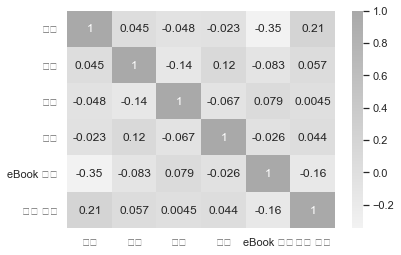

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

cmap = sns.light_palette("darkgray", as_cmap=True)
sns.heatmap(spring_x.corr(), annot=True, cmap=cmap)
plt.show()

## 다중공선성 확인 VIF

In [30]:
import statsmodels.api as sm;
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline
from patsy import dmatrices

In [31]:
subtit = spring['부제목']
page = spring['쪽수']
price = spring['정가']
ebook = spring['eBook 여부']
title = spring['제목 길이']
field = spring['분야']
bestseller = spring['베스트셀러 여부']

In [32]:
y, X = dmatrices('bestseller ~ subtit + page + price + ebook + title + field', data=spring, return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif

,VIF Factor,features
0,14.190027,Intercept
1,1.033523,subtit[T.1]
2,1.018448,page
3,1.024413,price
4,1.161644,ebook
5,1.058618,title
6,1.185612,field


In [33]:
x_data.mean()

부제목             0.661806
쪽수            371.344400
eBook 여부        0.605647
제목 길이          12.040335
평점              8.650667
정가          16689.458113
dtype: float64